# 커피 퀄리티 분석

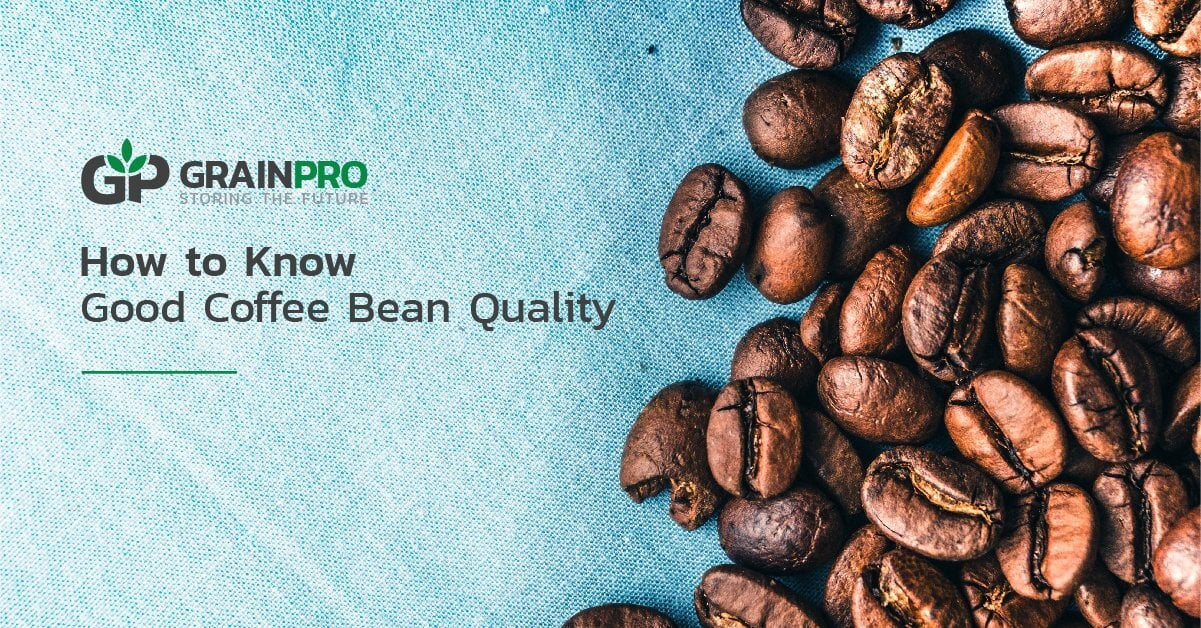

In [1]:
from IPython.display import Image
Image("../picture/high_coffee_bean_quality.jpg")

# 사용한 모듈

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.model_selection import train_test_split

# 사용한 데이터(https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi)

In [3]:
merged = pd.read_csv("../data/archive/merged_data_cleaned.csv")

In [4]:
print(merged.shape)
print('\n')
print(merged.info())
print('\n')
print(merged.describe())

(1339, 44)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1182 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1339 non-null   int64  
 13  Bag.Weight             1339 non-null   object 
 14  In.Country.Partner     1339 non-null   obje

# 전체적인 관계도 시각화

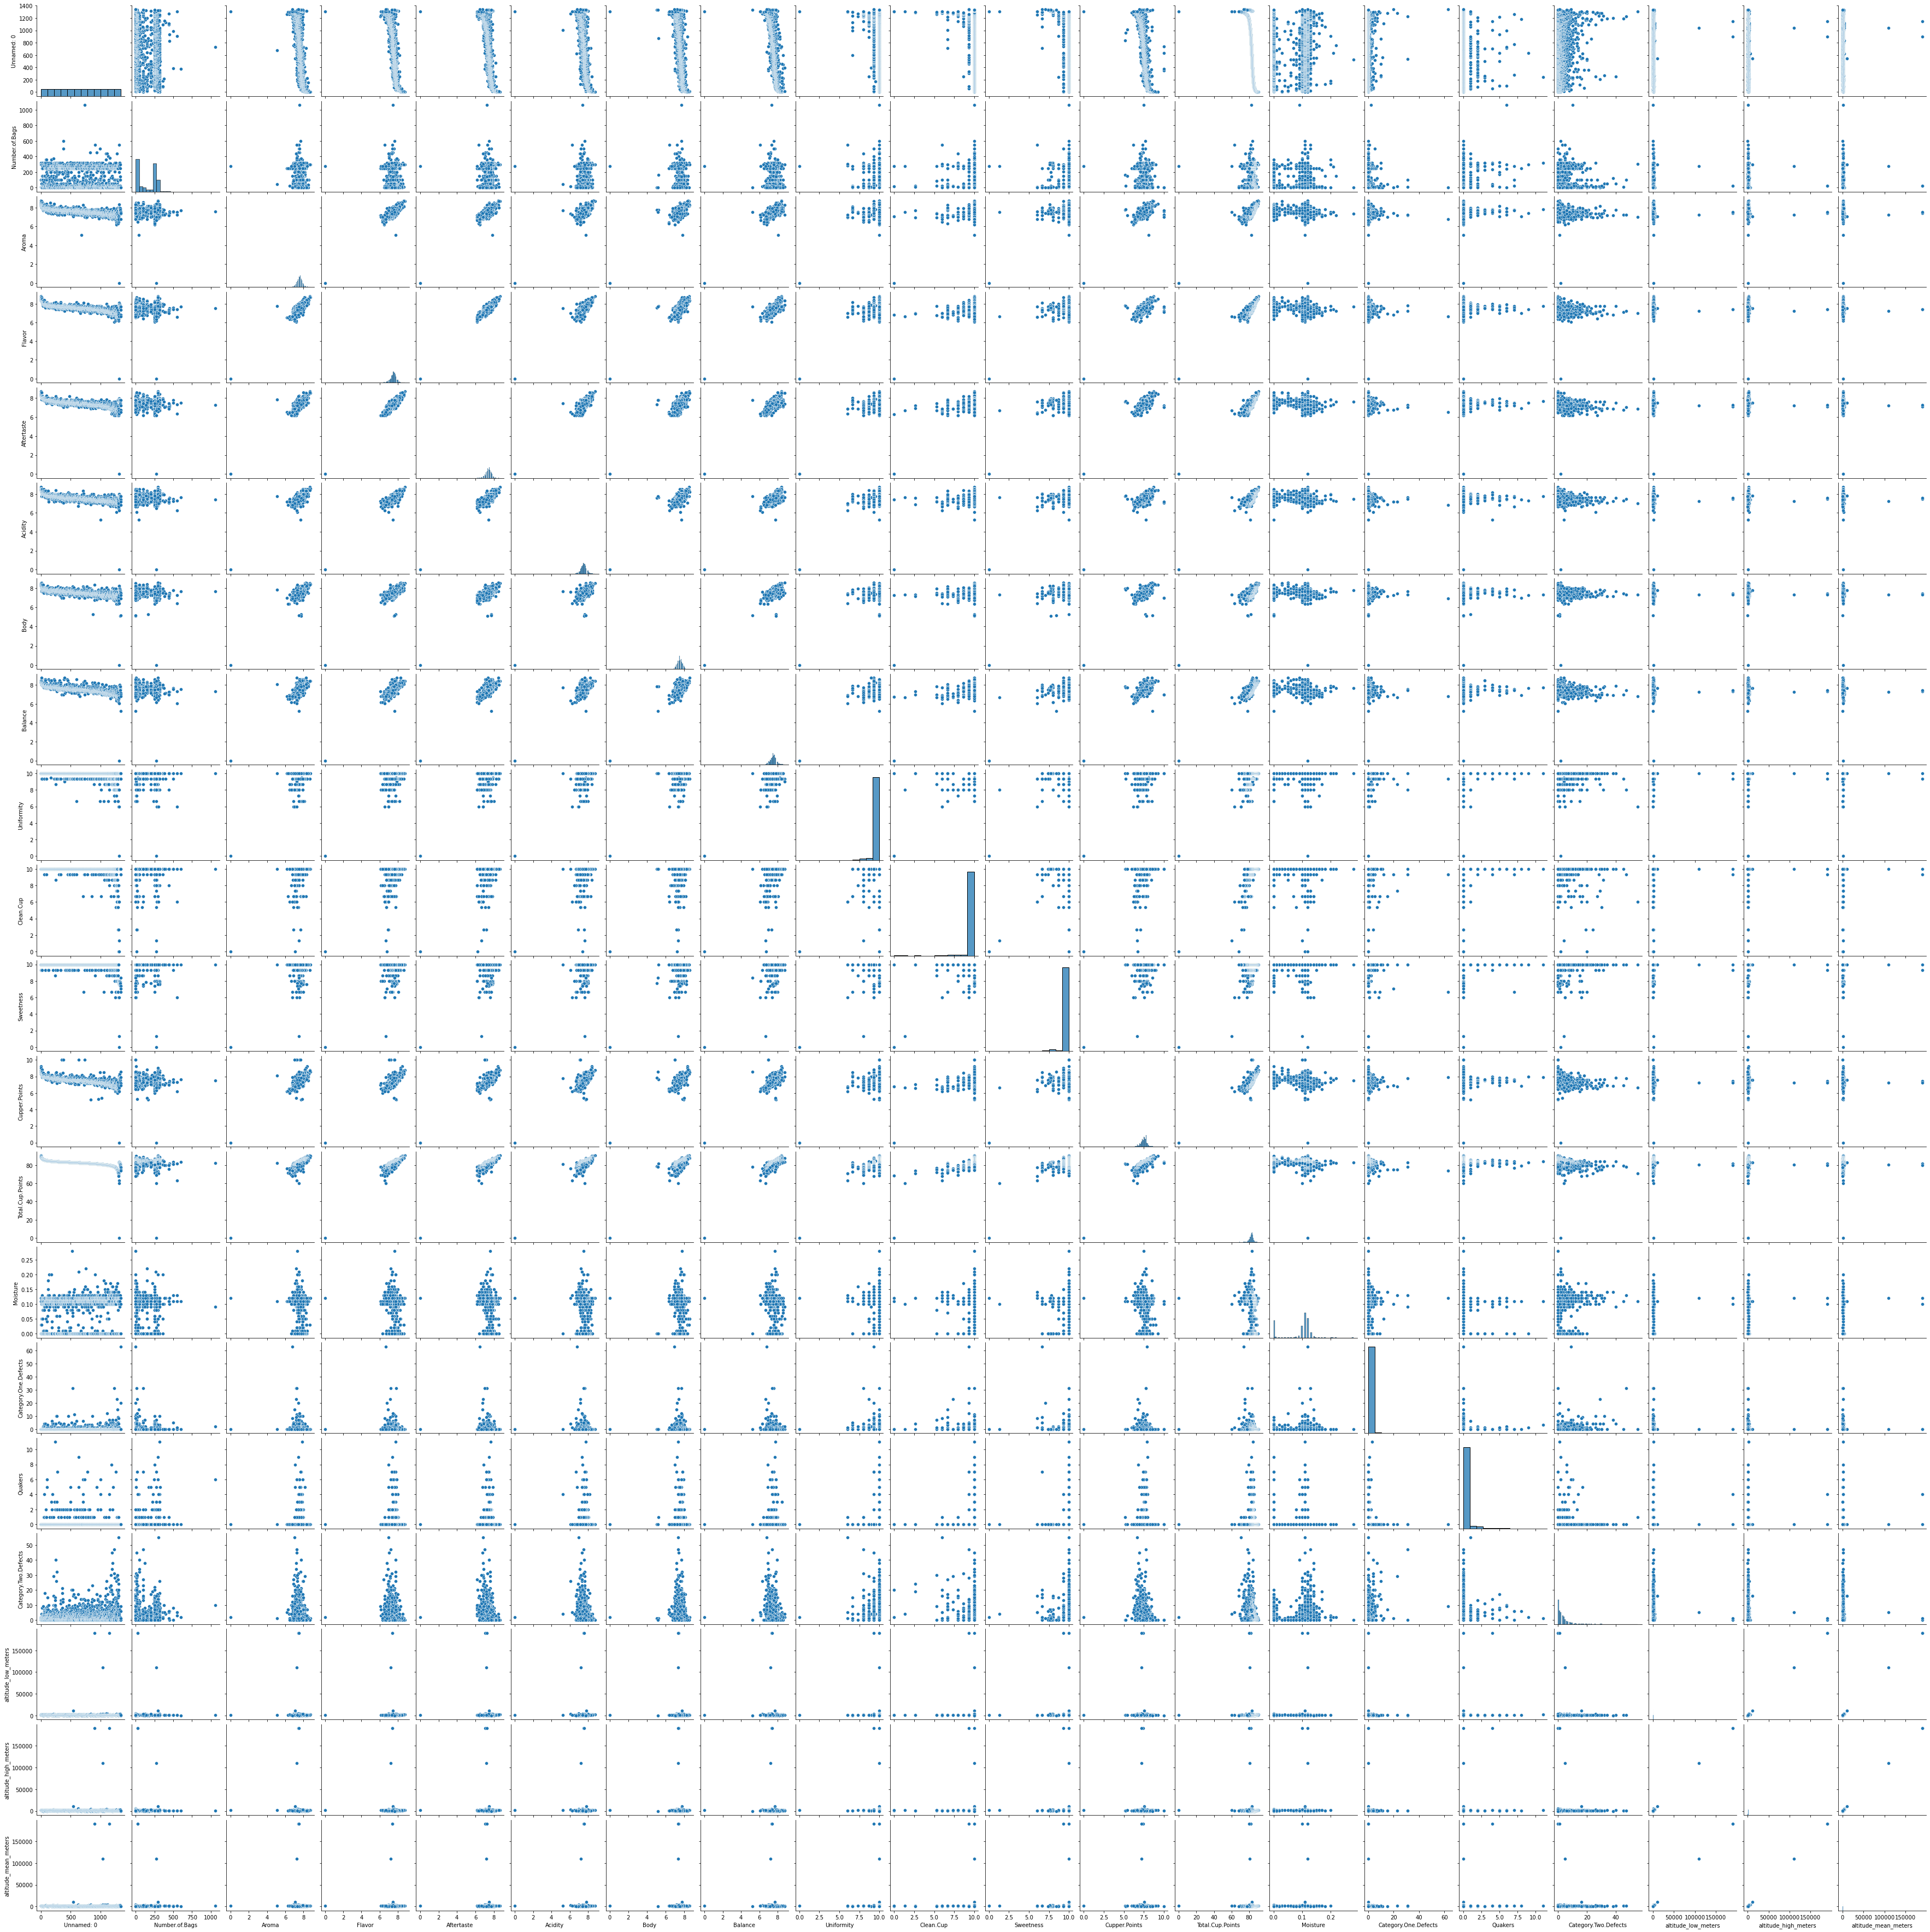

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
Unnamed: 0,1.000000,-0.063419,-0.591209,-0.694504,-0.685923,-0.613745,-0.552762,-0.651939,-0.315072,-0.294318,-0.295284,-0.661414,-0.678978,0.146185,0.107510,-0.022845,0.199510,0.038834,0.037094,0.037966
Number.of.Bags,-0.063419,1.000000,-0.007040,0.002094,0.000473,0.029384,0.032897,0.032402,0.025492,0.030733,0.002071,-0.006287,0.020226,-0.053701,-0.079895,0.134575,-0.001113,-0.025910,-0.026154,-0.026033
Aroma,-0.591209,-0.007040,1.000000,0.813259,0.777056,0.723582,0.673006,0.708634,0.366578,0.335684,0.253493,0.687288,0.791627,-0.134127,-0.096352,0.009058,-0.149024,-0.015680,-0.014786,-0.015234
Flavor,-0.694504,0.002094,0.813259,1.000000,0.895672,0.816688,0.735720,0.792290,0.410923,0.396958,0.291065,0.793197,0.874279,-0.145201,-0.088792,0.005135,-0.191956,-0.011503,-0.010250,-0.010877
Aftertaste,-0.685923,0.000473,0.777056,0.895672,1.000000,0.792255,0.734306,0.809639,0.401456,0.386665,0.266409,0.785123,0.860656,-0.180510,-0.104721,0.001044,-0.210016,-0.022862,-0.021363,-0.022114
Acidity,-0.613745,0.029384,0.723582,0.816688,0.792255,1.000000,0.706435,0.733017,0.375383,0.300927,0.261854,0.698151,0.797024,-0.129079,-0.084269,-0.013714,-0.136814,0.001188,0.002427,0.001807
Body,-0.552762,0.032897,0.673006,0.735720,0.734306,0.706435,1.000000,0.757597,0.326879,0.276587,0.268342,0.633208,0.757165,-0.147651,-0.044519,-0.004197,-0.085386,-0.013602,-0.011983,-0.012793
Balance,-0.651939,0.032402,0.708634,0.792290,0.809639,0.733017,0.757597,1.000000,0.400915,0.370341,0.283272,0.721132,0.828502,-0.199843,-0.082406,0.007715,-0.171100,-0.013014,-0.011128,-0.012072
Uniformity,-0.315072,0.025492,0.366578,0.410923,0.401456,0.375383,0.326879,0.400915,1.000000,0.526219,0.451083,0.359620,0.656454,0.013792,-0.105890,0.027441,-0.145833,-0.010379,-0.009632,-0.010006
Clean.Cup,-0.294318,0.030733,0.335684,0.396958,0.386665,0.300927,0.276587,0.370341,0.526219,1.000000,0.440644,0.356995,0.658859,-0.014916,-0.115594,0.025374,-0.232739,-0.004343,-0.004269,-0.004306


In [5]:
choeck_data = sns.pairplot(merged)
plt.show()
merged.corr()

# 커피 점수와 연관성이 관련된 열만 분류

In [6]:
merged_data = merged[["Species",'Aroma','Flavor','Acidity','Body','Balance','Uniformity','Sweetness',
                     'Total.Cup.Points','Moisture']]
print(merged_data)

      Species  Aroma  Flavor  Acidity  Body  Balance  Uniformity  Sweetness  \
0     Arabica   8.67    8.83     8.75  8.50     8.42       10.00      10.00   
1     Arabica   8.75    8.67     8.58  8.42     8.42       10.00      10.00   
2     Arabica   8.42    8.50     8.42  8.33     8.42       10.00      10.00   
3     Arabica   8.17    8.58     8.42  8.50     8.25       10.00      10.00   
4     Arabica   8.25    8.50     8.50  8.42     8.33       10.00      10.00   
...       ...    ...     ...      ...   ...      ...         ...        ...   
1334  Robusta   7.75    7.58     7.58  5.08     7.83       10.00       7.75   
1335  Robusta   7.50    7.67     7.75  5.17     5.25       10.00       8.42   
1336  Robusta   7.33    7.33     7.42  7.50     7.17        9.33       7.42   
1337  Robusta   7.42    6.83     7.17  7.25     7.00        9.33       7.08   
1338  Robusta   6.75    6.67     6.83  6.92     6.83        9.33       6.67   

      Total.Cup.Points  Moisture  
0               

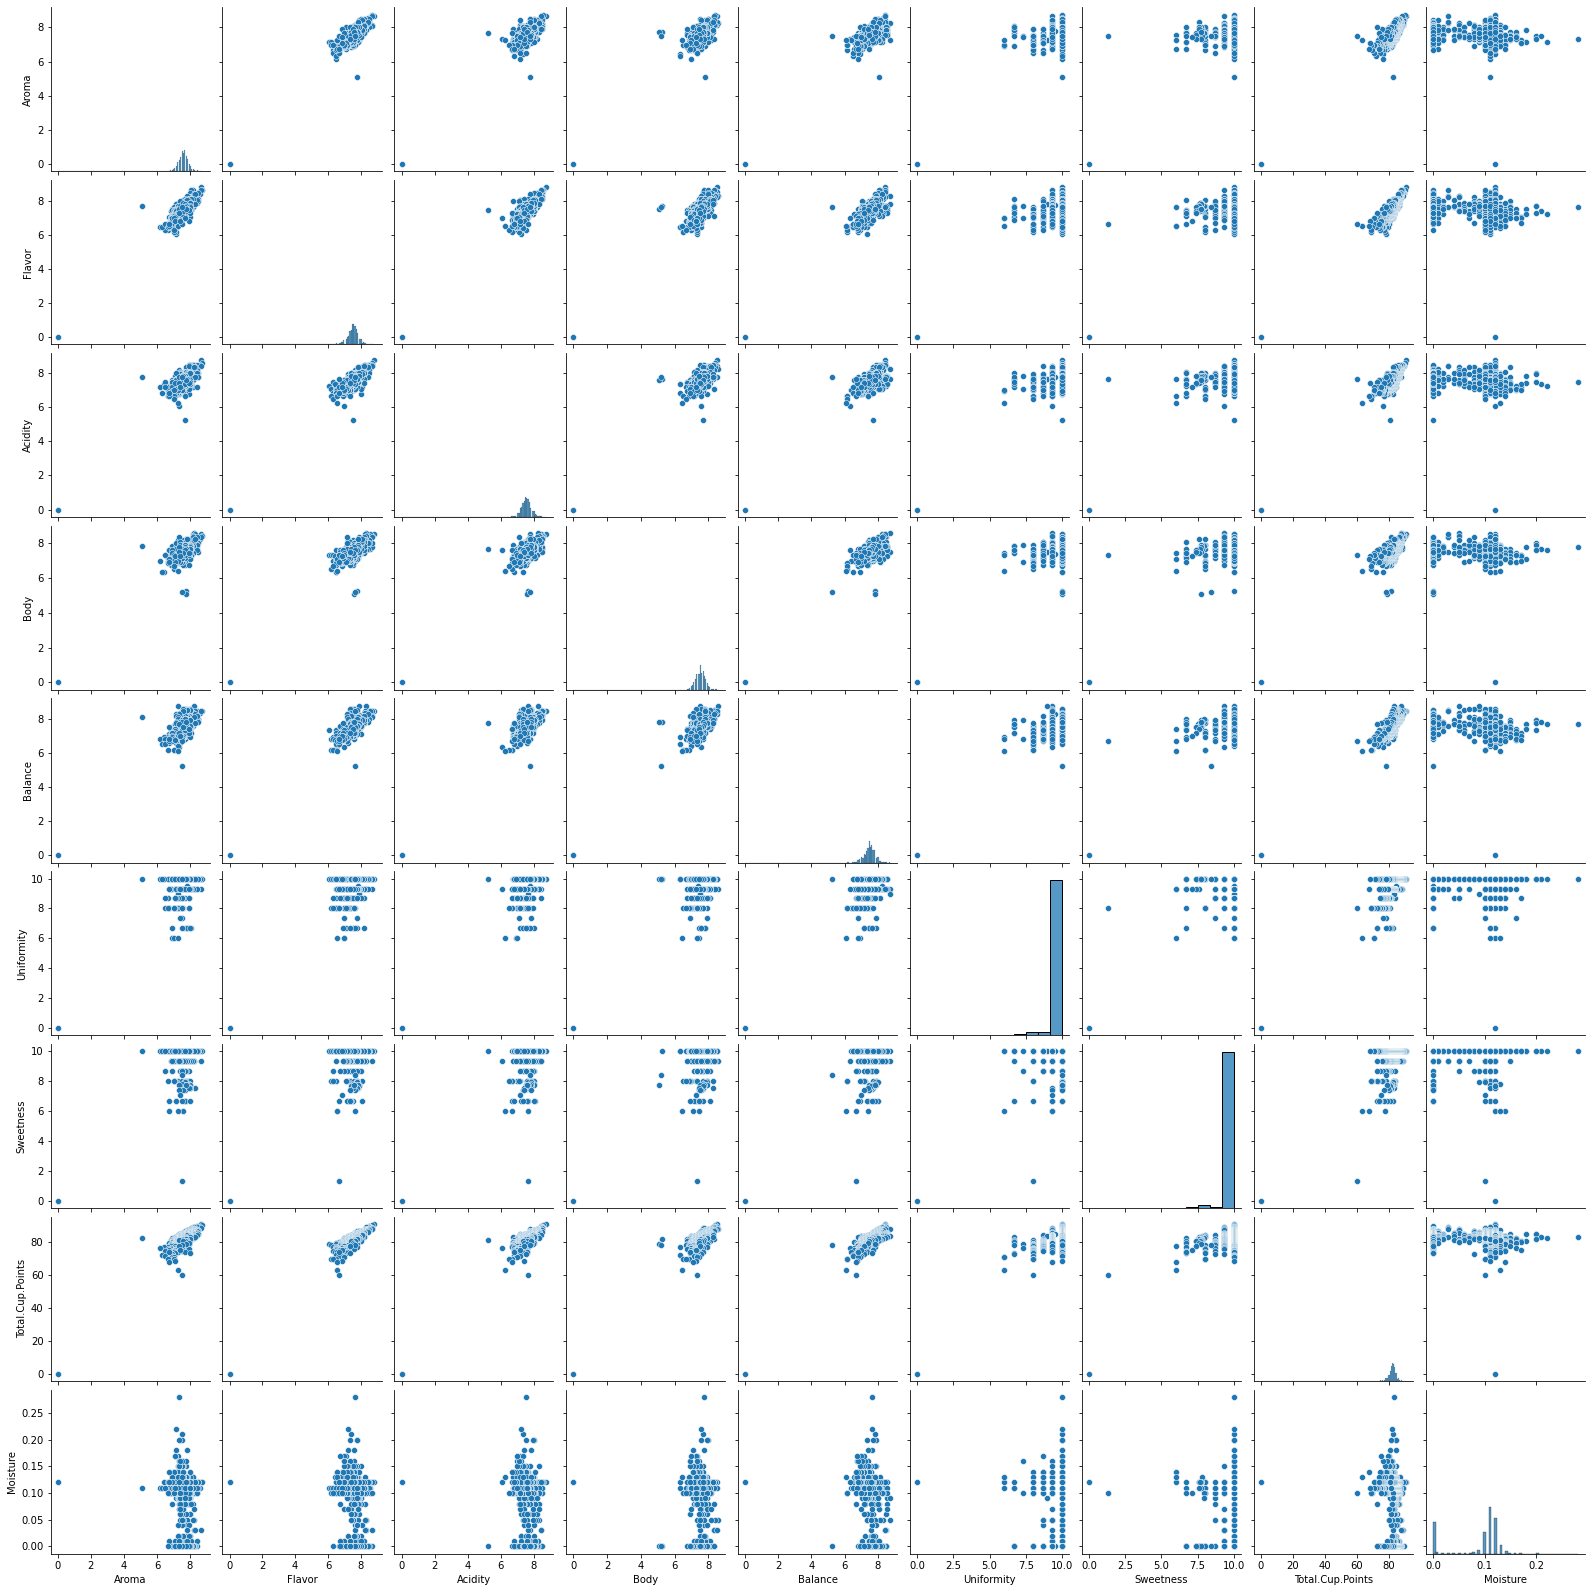

,Aroma,Flavor,Acidity,Body,Balance,Uniformity,Sweetness,Total.Cup.Points,Moisture
Aroma,1.000000,0.813259,0.723582,0.673006,0.708634,0.366578,0.253493,0.791627,-0.134127
Flavor,0.813259,1.000000,0.816688,0.735720,0.792290,0.410923,0.291065,0.874279,-0.145201
Acidity,0.723582,0.816688,1.000000,0.706435,0.733017,0.375383,0.261854,0.797024,-0.129079
Body,0.673006,0.735720,0.706435,1.000000,0.757597,0.326879,0.268342,0.757165,-0.147651
Balance,0.708634,0.792290,0.733017,0.757597,1.000000,0.400915,0.283272,0.828502,-0.199843
Uniformity,0.366578,0.410923,0.375383,0.326879,0.400915,1.000000,0.451083,0.656454,0.013792
Sweetness,0.253493,0.291065,0.261854,0.268342,0.283272,0.451083,1.000000,0.554029,0.072699
Total.Cup.Points,0.791627,0.874279,0.797024,0.757165,0.828502,0.656454,0.554029,1.000000,-0.117722
Moisture,-0.134127,-0.145201,-0.129079,-0.147651,-0.199843,0.013792,0.072699,-0.117722,1.000000


In [7]:
choeck_data = sns.pairplot(merged_data)
plt.show()
merged_data.corr()

### 커피 점수와 연관된 항목을 뽑은뒤 나름의 상관성을 보여짐

In [8]:
merged_corr = merged_data.corr()
merged_corr.loc[np.abs(merged_corr['Total.Cup.Points']) > 0.3, 'Total.Cup.Points']

Aroma               0.791627
Flavor              0.874279
Acidity             0.797024
Body                0.757165
Balance             0.828502
Uniformity          0.656454
Sweetness           0.554029
Total.Cup.Points    1.000000
Name: Total.Cup.Points, dtype: float64

# 커피의 요소중 가장 중요하게 여겨지는것은 
### 1.Flavor 2.Balance 3.Aroma 4. Acidity

### 이 자료의 신빙성을 보여주기 위해 모델의 성능 검정 실시
### 성능 검정 요인으로 다양한 오차값을 사용하여 모델의 성능평가

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)

# 훈련데이터 분류

In [10]:
# X요소에 커피의 특성으로 지정
X = merged_data.drop(['Species',"Total.Cup.Points"], axis=1)
print(X.head())
print('\n')
# y요소에 CQI에서 정한 커피의 점수를 타겟으로 지정
y = merged_data['Total.Cup.Points']
print(y.head())

   Aroma  Flavor  Acidity  Body  Balance  Uniformity  Sweetness  Moisture
0   8.67    8.83     8.75  8.50     8.42        10.0       10.0      0.12
1   8.75    8.67     8.58  8.42     8.42        10.0       10.0      0.12
2   8.42    8.50     8.42  8.33     8.42        10.0       10.0      0.00
3   8.17    8.58     8.42  8.50     8.25        10.0       10.0      0.11
4   8.25    8.50     8.50  8.42     8.33        10.0       10.0      0.12


0    90.58
1    89.92
2    89.75
3    89.00
4    88.83
Name: Total.Cup.Points, dtype: float64


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [12]:
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
lr.coef_

array([ 1.2221916 ,  2.58524146,  0.99787734,  0.70505287,  1.66401491,
        1.55996919,  1.31009664, -1.01585002])

In [14]:
# 위에 있는 요소들을 기울기로 표현 밑에있는 순서대로 위의 기울기 점수
X_train.columns

Index(['Aroma', 'Flavor', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Sweetness', 'Moisture'],
      dtype='object')

In [15]:
lr.intercept_

-0.08425262065647132

In [16]:
# 절편 값으로 예측치 설정
y_pred = lr.predict(X_test)

In [17]:
# 모든 경우의 에러값 계산
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

MAE = mean_absolute_error(y_test, y_pred) 
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MSLE = mean_squared_log_error(y_test, y_pred)
RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)

print(f'MAE:\t {MAE:.4f}', "평균 절대 오차, 실제 타겟값과 예측 타겟값 차의 절대값 평균")
print(f'MSE:\t {MSE:.4f}', "평균 제곱 오차, 실제 타겟 값과 예측 타겟값 차의 제곱의 평균")
print(f'RMSE:\t {RMSE:.4f}', "평균 제곱근 오차, MSE에 제곱근을 취한값")
print(f'MSLE:\t {MSLE:.4f}', "MSE에서 타겟값에 로그를 취한 값")
print(f'RMSLE:\t {RMSLE:.4f}', "MSLE에서 제곱근을 취한 값")
print(f'R2:\t {R2:.4f}', "결정계수, 예측 타겟값의 분산 / 실제 타겟값의 분산 *다른 지표와 다르게 1에 가까울수록 모델 성능이 좋습니다.")


#print(np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2))

MAE:	 0.3671 평균 절대 오차, 실제 타겟값과 예측 타겟값 차의 절대값 평균
MSE:	 0.8302 평균 제곱 오차, 실제 타겟 값과 예측 타겟값 차의 제곱의 평균
RMSE:	 0.9111 평균 제곱근 오차, MSE에 제곱근을 취한값
MSLE:	 0.0001 MSE에서 타겟값에 로그를 취한 값
RMSLE:	 0.0118 MSLE에서 제곱근을 취한 값
R2:	 0.8668 결정계수, 예측 타겟값의 분산 / 실제 타겟값의 분산 *다른 지표와 다르게 1에 가까울수록 모델 성능이 좋습니다.


데이터의 수치형 데이터만을 사용하여 커피의 질에 어떠한 영향이 있는지를 확이하기 위해서 전체적인 correlationship을 확인하고 어느정도 관계가 있는 요소들만을 따로 추출하여 이들의 상관관계의 점수를 확인 하였고 이들의 관계는 어느정도 우상향의 관계를 보여주고 가장 중요한 요소들이 무엇인지 알수 있었습니다. 그리고 이러한 관계를 확인해보기 위해서 다양한 오류값을 구해 보았고 최종적으로 R2모델의 성능평가는 0.86점으로 상담히 좋은 점수에 해당됨을 알수 있습니다.